In [1]:
#importing packages
import os
import h5py
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [2]:
#initializing ImageDataGenerater and importing training data
trainDataGen = ImageDataGenerator(
        rotation_range = 5,
        width_shift_range = 0.1,
        height_shift_range = 0.1,
        rescale = 1.0/255,
        shear_range = 0.2,
        zoom_range = 0.2,		
        horizontal_flip = False,
        fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale=1./255)
trainGenerator = trainDataGen.flow_from_directory(
            "DevanagariHandwrittenCharacterDataset/Train",
            target_size = (32,32),
            batch_size = 32,
            color_mode = "grayscale",
            class_mode = "categorical")


Found 78200 images belonging to 46 classes.


In [3]:
#importing testing data
validation_generator = test_datagen.flow_from_directory(
            "DevanagariHandwrittenCharacterDataset/Test",
            target_size=(32,32),
            batch_size=32,
            color_mode = "grayscale",
            class_mode= 'categorical')


Found 13800 images belonging to 46 classes.


In [4]:
#adding cnn layers
model = Sequential()

#Layer1----------------------------------------------------------
model.add(Convolution2D(filters = 32,
            kernel_size = (3,3),
            strides = 1,
            activation = "relu",
            input_shape = (32,32,1)))

model.add(BatchNormalization())
#model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2),
            strides=(2, 2),
            padding="same"))

#Layer2-------------------------------------------------------------
model.add(Convolution2D(filters = 32,
            kernel_size = (3,3),
            strides = 1,
            activation = "relu",
            input_shape = (32,32,1)))
model.add(BatchNormalization())
#model.add(MaxPooling2D())
model.add(MaxPooling2D(pool_size=(2, 2),
            strides=(2, 2),
            padding="same"))
#model.add(Dropout(0.25))


#Layers 3-----------------------------------------------------------	
model.add(Convolution2D(filters = 64,
            kernel_size = (3,3),
            strides = 1,
            activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
            strides=(2, 2),
            padding="same"))


#Layer 4--------------------------------------------------
model.add(Convolution2D(filters = 64,
            kernel_size = (3,3),
            strides= 1,
            activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
            strides=(2, 2),
            padding="same"))
#model.add(Dropout(0.2))


In [5]:
#flattening data and adding hidden layers
model.add(Flatten())

model.add(Dense(128,
        activation = "relu",
        kernel_initializer = "uniform"))
model.add(BatchNormalization())

model.add(Dense(64,
        activation = "relu",
        kernel_initializer = "uniform"))
model.add(BatchNormalization())

model.add(Dense(46,
        activation = "softmax",
        kernel_initializer = "uniform"))

model.compile(optimizer = "adam",
        loss = "categorical_crossentropy",
        metrics = ["accuracy"])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 64)          1

In [6]:
#if no change in validation loss - learning rate will be decreased
anne = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

In [7]:
#fitting the model
hin_cnn =model.fit(
        trainGenerator,
        epochs = 25,
        steps_per_epoch = 2444,
        validation_data = validation_generator,
        validation_steps = 432)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
2444/2444 [==============================] - 170s 70ms/step - loss: 0.8021 - accuracy: 0.7762 - val_loss: 0.1663 - val_accuracy: 0.9483
Epoch 2/25
2444/2444 [==============================] - 58s 24ms/step - loss: 0.3039 - accuracy: 0.9056 - val_loss: 0.1324 - val_accuracy: 0.9579
Epoch 3/25
2444/2444 [==============================] - 57s 24ms/step - loss: 0.2330 - accuracy: 0.9272 - val_loss: 0.1073 - val_accuracy: 0.9667
Epoch 4/25
2444/2444 [==============================] - 58s 24ms/step - loss: 0.1983 - accuracy: 0.9386 - val_loss: 0.0970 - val_accuracy: 0.9707
Epoch 5/25
2444/2444 [==============================] - 57s 23ms/step - loss: 0.1773 - accuracy: 0.9454 - val_loss: 0.0925 - val_accuracy: 0.9703
Epoch 6/25
2444/2444 [==============================] - 58s 24ms/step - loss: 0.1629 - accuracy: 0.9488 - val_loss: 0.0762 - val_accuracy: 0.9765
Epoch 7/25
2444/2444 [=========================

In [8]:
#saving model
model.save("HindiModel-97.h5")

In [9]:
#plotting graphs
%matplotlib inline
accu=hin_cnn.history['accuracy']
val_acc=hin_cnn.history['val_accuracy']
loss=hin_cnn.history['loss']
val_loss=hin_cnn.history['val_loss']

epochs=range(len(accu)) #No. of epochs



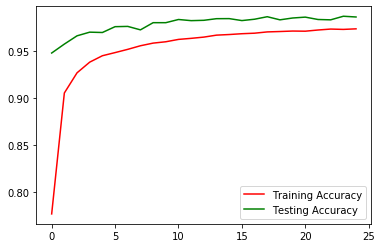

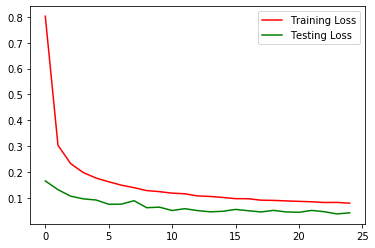

In [10]:
#plotting graphs
import matplotlib.pyplot as plt
plt.plot(epochs,accu,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')

plt.savefig('training_acuuracy_hin.png')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')

plt.savefig('training_loss_hin.png')
plt.legend()
plt.show()

